<a href="https://colab.research.google.com/github/vishwanaik15/DMASSIGNMENT02/blob/main/Naik_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:Naik Vishwa chetankumar                                                     
UTA ID:1001871311                                                                
CSE-5334-002 Data Mining                                                         
Assignment 02**

**Task:The goal of this assignment is to learn about the concept of overfitting using the Higher order linear regression.**

**Importing required dependencies**


In [342]:
import operator
from math import *
import random
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import math

**A.Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + 0.1 * N**


*   Use uniform distribution between 0 and 1 for X
*   Sample N from the normal gaussian distribution 



In [343]:
X=[]
Y=[]
data =[]
Y1value=[]
y1=[]
mu, sigma = 0,1
for i in range(20):
    X1 = random.uniform(0,1)    
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + 0.1* N
    X = np.append(X,X1)
    Y = np.append(Y,Y1)

data = np.column_stack((X,Y)) 
print("Datapoints are:")
print(data)
print("Y1 values:")
print(Y1)


Datapoints are:
[[ 0.88738454 -0.7080097 ]
 [ 0.51087783 -0.06881771]
 [ 0.97996588 -0.25928191]
 [ 0.25768308  1.03144883]
 [ 0.83710772 -0.94770522]
 [ 0.70683376 -0.88826539]
 [ 0.95828436 -0.175114  ]
 [ 0.39610967  0.68871613]
 [ 0.11430467  0.69532206]
 [ 0.81518054 -1.08398823]
 [ 0.98172892 -0.14281167]
 [ 0.55823537 -0.28907497]
 [ 0.23927452  1.07784214]
 [ 0.3481512   0.67693165]
 [ 0.00532321  0.17535925]
 [ 0.54686964 -0.23405917]
 [ 0.66603518 -0.94064574]
 [ 0.11357256  0.52578995]
 [ 0.58017188 -0.65261627]
 [ 0.8340186  -0.92150531]]
Y1 values:
-0.9215053097268731


**Use 10 for train and 10 for test**



In [344]:
#Split data in tarindata and testdata
X_traindata, X_testdata, Y_traindata, Y_testdata = train_test_split(data, Y, test_size=0.5)

In [345]:
print("X Train Datapoints:")
print(X_traindata)
X_traindata.shape

X Train Datapoints:
[[ 0.25768308  1.03144883]
 [ 0.55823537 -0.28907497]
 [ 0.58017188 -0.65261627]
 [ 0.81518054 -1.08398823]
 [ 0.00532321  0.17535925]
 [ 0.51087783 -0.06881771]
 [ 0.88738454 -0.7080097 ]
 [ 0.97996588 -0.25928191]
 [ 0.11357256  0.52578995]
 [ 0.70683376 -0.88826539]]


(10, 2)

In [346]:
X_traindata = X_traindata[:,0].reshape(-1,1) 
#make data in column
print(X_traindata)
X_traindata.shape

[[0.25768308]
 [0.55823537]
 [0.58017188]
 [0.81518054]
 [0.00532321]
 [0.51087783]
 [0.88738454]
 [0.97996588]
 [0.11357256]
 [0.70683376]]


(10, 1)

In [347]:
print("X Test Datapoints:")
print(X_testdata)
X_testdata.shape

X Test Datapoints:
[[ 0.54686964 -0.23405917]
 [ 0.11430467  0.69532206]
 [ 0.83710772 -0.94770522]
 [ 0.98172892 -0.14281167]
 [ 0.66603518 -0.94064574]
 [ 0.23927452  1.07784214]
 [ 0.95828436 -0.175114  ]
 [ 0.3481512   0.67693165]
 [ 0.8340186  -0.92150531]
 [ 0.39610967  0.68871613]]


(10, 2)

In [348]:
X_testdata = X_testdata[:,0].reshape(-1,1)
print(X_testdata)
X_testdata.shape

[[0.54686964]
 [0.11430467]
 [0.83710772]
 [0.98172892]
 [0.66603518]
 [0.23927452]
 [0.95828436]
 [0.3481512 ]
 [0.8340186 ]
 [0.39610967]]


(10, 1)

In [349]:
print("Y Train Datapoints:")
Y_traindata = Y_traindata.reshape(-1,1)
print(Y_traindata)
Y_traindata.shape

Y Train Datapoints:
[[ 1.03144883]
 [-0.28907497]
 [-0.65261627]
 [-1.08398823]
 [ 0.17535925]
 [-0.06881771]
 [-0.7080097 ]
 [-0.25928191]
 [ 0.52578995]
 [-0.88826539]]


(10, 1)

In [350]:
print("Y Test Datapoints:")
Y_testdata = Y_testdata.reshape(-1,1)
print(Y_testdata)
Y_testdata.shape

Y Test Datapoints:
[[-0.23405917]
 [ 0.69532206]
 [-0.94770522]
 [-0.14281167]
 [-0.94064574]
 [ 1.07784214]
 [-0.175114  ]
 [ 0.67693165]
 [-0.92150531]
 [ 0.68871613]]


(10, 1)

<b>B.Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9
</b>

In [351]:
#plot and calculate weight for the degree 0, 1 , 3 , 9
print("Weights for given [0,1,3,9] Degree values:")
print("Weights of polynomial regression of order 0 are: \n", np.polyfit(X_traindata[:,0],Y_traindata[:,0],0).reshape(-1,1))
print("\nWeights of polynomial regression of order 1 are: \n", np.polyfit(X_traindata[:,0],Y_traindata[:,0],1).reshape(-1,1))
print("\nWeights of polynomial regression of order 3 are: \n", np.polyfit(X_traindata[:,0],Y_traindata[:,0],3).reshape(-1,1))
print("\nWeights of polynomial regression of order 9 are: \n", np.polyfit(X_traindata[:,0],Y_traindata[:,0],9).reshape(-1,1))

Weights for given [0,1,3,9] Degree values:
Weights of polynomial regression of order 0 are: 
 [[-0.22174562]]

Weights of polynomial regression of order 1 are: 
 [[-1.48945256]
 [ 0.584827  ]]

Weights of polynomial regression of order 3 are: 
 [[ 19.62192602]
 [-29.14411582]
 [  9.45328917]
 [  0.03044048]]

Weights of polynomial regression of order 9 are: 
 [[-5.63798912e+05]
 [ 2.72285364e+06]
 [-5.57368500e+06]
 [ 6.28339684e+06]
 [-4.23713516e+06]
 [ 1.73351586e+06]
 [-4.14648616e+05]
 [ 5.20956066e+04]
 [-2.61727412e+03]
 [ 1.26926135e+01]]


<b>C.Display weights in table </b>

In [352]:
print("Table of weights")
table = {'M=0': np.polyfit(X_traindata[:,0],Y_traindata[:,0],0),
         'M=1': np.polyfit(X_traindata[:,0],Y_traindata[:,0],1),
         'M=3': np.polyfit(X_traindata[:,0],Y_traindata[:,0],3),
         'M=9': np.polyfit(X_traindata[:,0],Y_traindata[:,0],9),
        }
pd.DataFrame({ key:pd.Series(value) for key, value in table.items() })

Table of weights


,M=0,M=1,M=3,M=9
0,-0.221746,-1.489453,19.621926,-5.637989e+05
1,NaN,0.584827,-29.144116,2.722854e+06
2,NaN,NaN,9.453289,-5.573685e+06
3,NaN,NaN,0.030440,6.283397e+06
4,NaN,NaN,NaN,-4.237135e+06
5,NaN,NaN,NaN,1.733516e+06
6,NaN,NaN,NaN,-4.146486e+05
7,NaN,NaN,NaN,5.209561e+04
8,NaN,NaN,NaN,-2.617274e+03
9,NaN,NaN,NaN,1.269261e+01


<b>D. Draw a chart of fit data
</b>

In [353]:
X_traindata, Y_traindata = zip(*sorted(zip(X_traindata, Y_traindata)))

Chartes for different degrees:
Chart for degree = 0


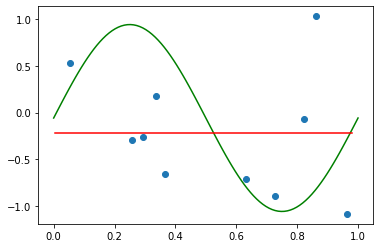

------------------------------------------------------------
Chart for degree = 1


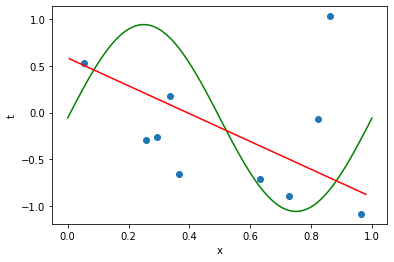

------------------------------------------------------------
Chart for degree = 2


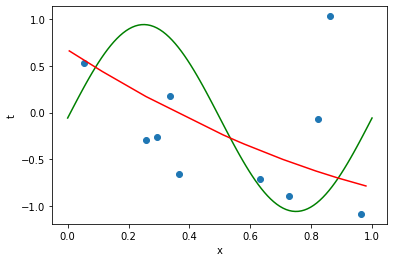

------------------------------------------------------------
Chart for degree = 3


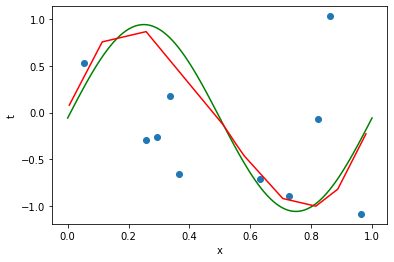

------------------------------------------------------------
Chart for degree = 4


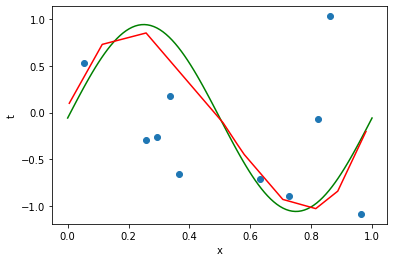

------------------------------------------------------------
Chart for degree = 5


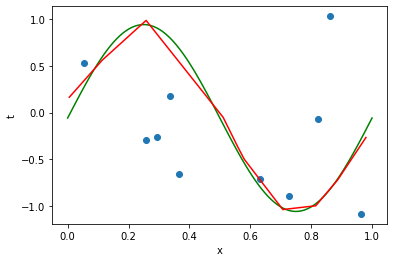

------------------------------------------------------------
Chart for degree = 6


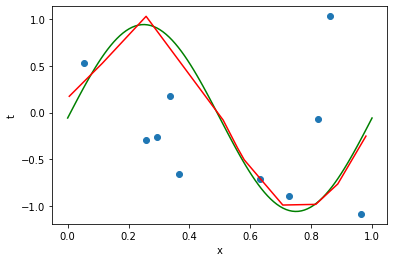

------------------------------------------------------------
Chart for degree = 7


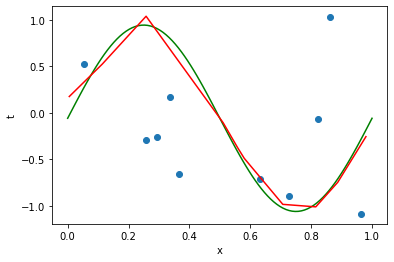

------------------------------------------------------------
Chart for degree = 8


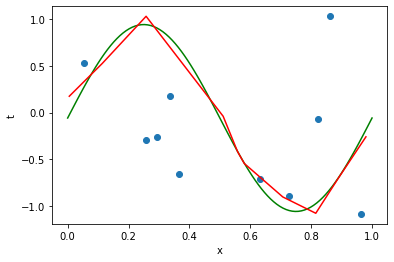

------------------------------------------------------------
Chart for degree = 9


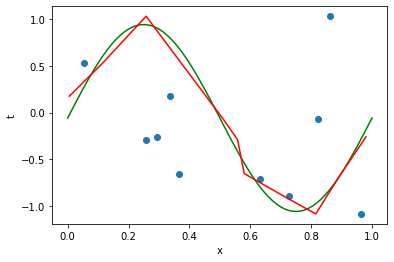

------------------------------------------------------------


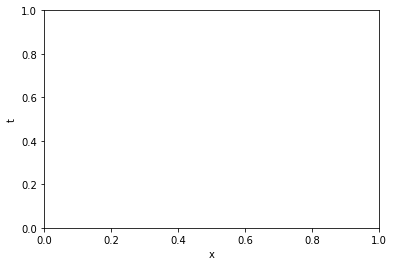

In [354]:
print("Chartes for different degrees:")
for i in range(10):
    print('Chart for degree = %d' %(i))
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x) + 0.1 * N
    plt.plot(x,y,color='g') 
    
    #generate polynomial feature
    poly_features=PolynomialFeatures(degree=i)
    X_poly=poly_features.fit_transform(X_traindata)    
    model=LinearRegression()
    #linear model fot X and Y
    model.fit(X_poly,Y_traindata) 
    plt.plot(X_train,Y_traindata,'o')
    plt.plot(X_traindata,model.predict(X_poly), color='r')
    plt.show()
    plt.xlabel('x') 
    plt.ylabel('t') 
    print("-"*60)

<b>E.Draw train error vs test error</b></br>
Here I ahve used Root Mean Square Error function:</br>
<li>
RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function.</br></li>
<li>Using RMSE, we can easily plot a difference between the estimated and actual values of a parameter of the model.</br></li>


In [355]:
rmse_traindata=[]
rmse_testdata=[]

#i used for loop to get 
for i in range(10):
    poly_features = PolynomialFeatures(degree=i)
    X_poly=poly_features.fit_transform(X_traindata)
    model=LinearRegression()
    model.fit(X_poly,Y_traindata) 
    rmse = sqrt(mean_squared_error(Y_traindata, model.predict(poly_features.fit_transform(X_traindata))))
    rmse_traindata.append(rmse)
    
    X_poly=poly_features.fit_transform(X_testdata)
    rmset = sqrt(mean_squared_error(Y_testdata, model.predict(poly_features.fit_transform(X_testdata))))
    rmse_testdata.append(rmset)

In [356]:
print("rmse train data:")
print(rmse_traindata)

rmse train data:
[0.6265892114407562, 0.421742571313861, 0.4181899248306311, 0.12476629878188554, 0.12308225498262622, 0.07921111316307002, 0.0731851394126999, 0.07163033155805064, 0.054285874248470915, 3.0056056876803323e-10]


In [357]:
print("rmse test data:")
print(rmse_testdata)

rmse test data:
[0.7555499938913819, 0.5545863007109064, 0.5480651673206474, 0.14097875916806524, 0.13826503957876432, 0.10604410910904259, 0.11656073702761643, 0.10821222322768538, 0.28877223245492456, 3.4741032533605583]


Graph for Train error vs Test error


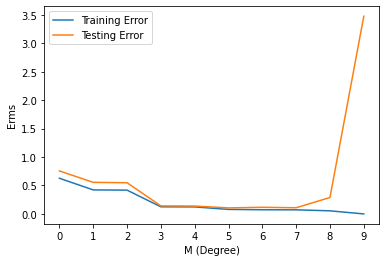

In [358]:
print("Graph for Train error vs Test error")
degree = ['0','1','2','3','4','5','6','7','8','9']

#plot chart
fig,ax = plt.subplots()
ax.plot(degree, rmse_traindata, label = 'Training Error')
ax.plot(degree, rmse_testdata, label = 'Testing Error')
leg = ax.legend()
plt.xlabel('M (Degree)')
plt.ylabel('Erms')
plt.show()

<b>F.Now generate 100 more data and fit 9th order model and draw fit.
</b>

In [359]:
mu,sigma = 0,1
X = []
Y = []
for i in range(100):
    X1 = random.uniform(0,1)
    N = np.random.normal(mu,sigma)
    Y1 = sin(2*pi*X1) + 0.1 * N
    X = np.append(X,X1)
    Y = np.append(Y,Y1)
new_data = np.column_stack((X,Y))

In [360]:
X = new_data[:,0].reshape(-1,1)
Y = new_data[:,1].reshape(-1,1)

In [361]:
X,Y = zip(*sorted(zip(X, Y)))

Draw Fit


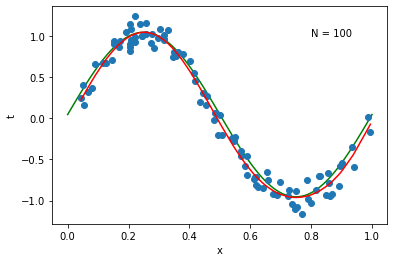

In [362]:
print("Draw Fit")
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x) + 0.1 * N  
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X)
model=LinearRegression()
model.fit(X_poly,Y) 
plt.plot(X,Y,'o')
plt.plot(X,model.predict(X_poly), color='r') #predicting Y value from X value and then plot it

plt.text(0.8, 1,'N = 100')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<b>Selected 20 data and fit 9th order model and draw fit</b>

In [363]:
X20 = new_data[:20,0].reshape(-1,1)
Y20 = new_data[:20,1].reshape(-1,1)
X20,Y20 = zip(*sorted(zip(X20, Y20)))

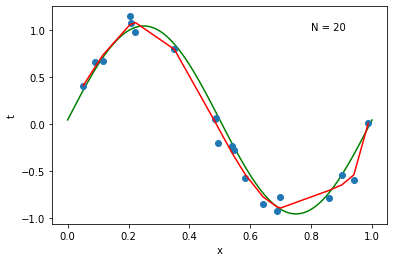

In [364]:
x = np.linspace(0, 1, 100) 
y = np.sin(2*pi*x) + 0.1* N 
plt.plot(x,y,color='g') 

poly_features=PolynomialFeatures(9)
X_poly=poly_features.fit_transform(X20)
model=LinearRegression()

model.fit(X_poly,Y20) 
plt.plot(X20,Y20,'o')
plt.plot(X20,model.predict(X_poly), color='r')

plt.text(0.8,1,'N = 20')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

<b>G.Now we will regularize using the sum of weights.</b></br>
<b>H.Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 </b>

In [365]:
lamda = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
train_error_for_lamda = []
test_error_for_lamda = []

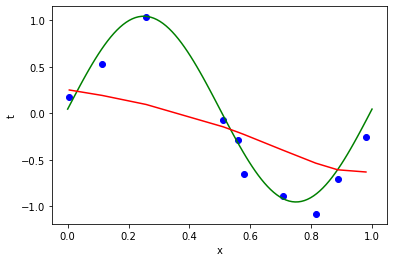

------------------------------------------------------------


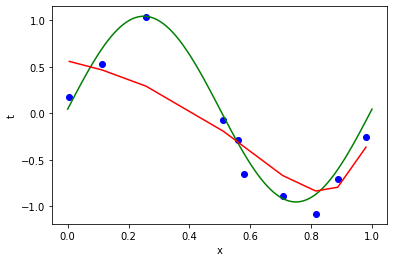

------------------------------------------------------------


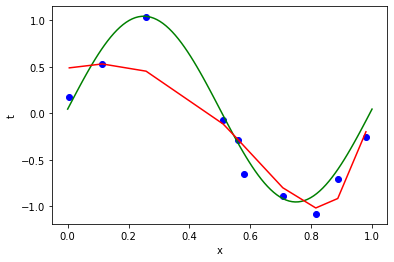

------------------------------------------------------------


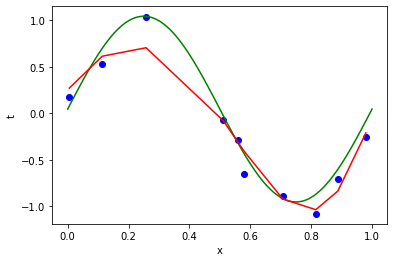

------------------------------------------------------------


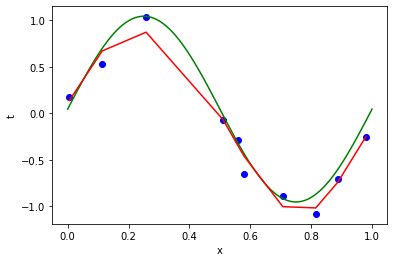

------------------------------------------------------------


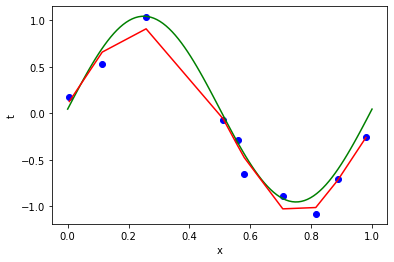

------------------------------------------------------------


In [366]:
for i in lamda:
    
    x = np.linspace(0, 1, 100)
    y = np.sin(2*pi*x) +  0.1 * N
    plt.plot(x,y,color='g')
    
    poly_features = PolynomialFeatures(9)
    X_poly = poly_features.fit_transform(X_traindata)
    poly_features.fit(X_poly,Y_traindata) 
    reg = linear_model.Ridge(alpha = i) 
    reg.fit(X_poly, Y_traindata)
    #predicted Y
    Y_pred = reg.predict(poly_features.fit_transform(X_traindata)) 
    plt.scatter(X_traindata, Y_traindata, color = 'blue')
    plt.plot(X_traindata, Y_pred, color = 'red')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    print("-"*60)
       
    rmse = sqrt(mean_squared_error(Y_traindata, reg.predict(poly_features.fit_transform(X_traindata))))
    train_error_for_lamda.append(rmse)
    rmse = sqrt(mean_squared_error(Y_testdata, reg.predict(poly_features.fit_transform(X_testdata))))
    test_error_for_lamda.append(rmse)

In [367]:
print(train_error_for_lamda)

[0.43318963372784874, 0.3041407034615776, 0.24128885184833632, 0.14305040579976894, 0.10242611824230838, 0.09698515296930296]


In [368]:
print(test_error_for_lamda)

[0.568139749200231, 0.4033659169915159, 0.3032271775703722, 0.1794380073502337, 0.10932274867954034, 0.09820342749081726]


Graph for test and train error according to lamda: 


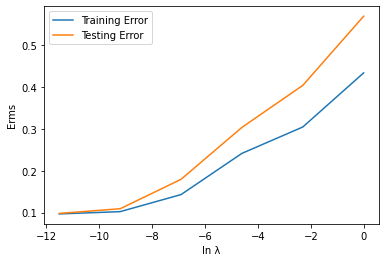

In [369]:
print("Graph for test and train error according to lamda: ")
fig,ax = plt.subplots()
ax.plot(np.log(lamda),train_error_for_lamda, label="Training Error")
ax.plot(np.log(lamda),test_error_for_lamda, label="Testing Error")
leg = ax.legend()
plt.xlabel('ln λ')
plt.ylabel('Erms')
plt.show()

<b>J.Based on the best test performance, what is your model? </b>

From given model of X_testdata and Y_testdata and given 0, 1, 3, 9 degrees, I can conclude that for <b>Degree = 3</b>, model gives best performance of all.

<ul><li>https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html</li>
<li>https://scikit-learn.org/stable/modules/linear_model.html</li>
<li>https://corporatefinanceinstitute.com/resources/knowledge/other/overfitting/</li>
<li>https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</li>
<li>https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html</li>
<li>https://www.askpython.com/python/examples/rmse-root-mean-square-error<li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html</li>
<li>https://daviddalpiaz.github.io/r4sl/regression-for-statistical-learning.html</li></ul>